### Workshop series, Koç University, Turkey, 11-12 April 2023

##  [Introduction to Computational Social Science methods with Python](https://socialcomquant.ku.edu.tr/intro-to-css-methods-with-python/)

# Workshop 3: Introduction to machine learning with Python - Use case

**Description**: Like Quantitative Social Science, Computational Social Science (CSS) is often concerned with the problem of explaining correlations in observational data. But beyond that, CSS is also concerned with predicting the numerical properties of observations or what categories they belong to. While explanations are also done in CSS with conventional statistical models (like the Generalized Linear Model), predictions are the turf of machine learning (ML). In the workshop, we will provide a basic understanding of ML, how predictions are made, and to what extent explanations are possible. We will touch upon the basics of supervised and unsupervised ML. Within supervised ML, regression is about predicting numbers, and classification is about predicting categories. Within unsupervised learning, clustering is about grouping observations, and dimensionality reduction is about grouping variables (in ML called features). In many cases, ML is performed on tables of observations (in rows) and features (in columns). We will be using such a non-social toy dataset to demonstrate the methods and a social dataset to learn about the practice of CSS. The workshop will alternate between live-coding demonstrations and periods in which participants apply that knowledge in context, both using Jupyter Notebooks. The software we will be using is scikit-learn, a standard Python library that is simple to understand, provides a breadth of options, and has a large user community. At the end of the workshop, participants will have an intuition about what ML can and cannot do. We will close with an outlook on how ML relates to Artificial Intelligence.

**Target group**: Undergraduate, master students, doctoral candidates, and experienced researchers who want to get introduced to the practice of Computational Social Science.

**Requirements**: Participants are expected to know the basics of Python and have at least some experience using it. For the workshops, participants should bring a running system on which they can execute Jupyter Notebooks. We will be using Python 3.9 and several standard libraries that are part of the Anaconda 2022.10 distribution or can be installed on top of that. A list of libraries and versions of these libraries that participants should import will be circulated before the workshops. We recommend that participants install Anaconda 2022.10. Feel free to also work in a cloud-like Google Colab. Consult [this link](https://github.com/gesiscss/css_methods_python/blob/main/a_introduction/1_computing_environment.ipynb) for more detailed instructions on how to set up your computing environment.

**Lecturers**: Dr. Arnim Bleier is a senior researcher in the Computational Social Science department at GESIS - Leibniz Institute for the Social Sciences. His research interests are in the field of Natural Language Processing and reproducibility. In collaboration with social scientists, he develops Bayesian models for the content, structure and dynamics of social phenomena. Dr. Haiko Lietz is a postdoctoral researcher in the Computational Social Science department at GESIS - Leibniz Institute for the Social Sciences. His research interests are in computational sociology, network science, and complexity science.

## The V-Dem use case

> Varieties of Democracy (V-Dem) is a unique approach to conceptualizing and measuring democracy. V-Dem distinguishes between five high-level principles of democracy: electoral, liberal, participatory, deliberative, and egalitarian, and collects data to measure these principles. ([Source](https://www.v-dem.net/about/))

The V-Dem dataset consists of countries (observations in rows) described by several hundred of variables (in columns) obtained by surveys, from country websites, and from other sources. We use data about electoral democracy for the year 2019. The following figure shows that several **indicators** (shown in the top row) are supposed to measure five latent low-level **indices** (from "Freedom of expression" to "Elected officials") which explain the high-level **index** of "Electoral democracy". In the first part, we will reduce the number of variables and cluster the countries. In the second part, we will predict a continuous numerical measure of a nation's internet freedoms and a four-part regime classification from the indices and indicators.

<img src='./images/vdem.jpg' width="800">

## Documentation of scikit-learn 1.0.2

https://scikit-learn.org/1.0/user_guide.html

## Data preprocessing

In [1]:
import pandas as pd

In [2]:
vdem = pd.read_csv(filepath_or_buffer='data/vdem.tsv', sep='\t', encoding='utf-8', low_memory=False)
vdem

,country_name,total_score,v2x_regime,v2x_polyarchy,v2x_freexp_altinf,v2mecenefm,v2meharjrn,v2meslfcen,v2mebias,v2merange,...,v2elembaut,v2elembcap,v2x_elecoff,v2lgbicam,v2lgello,v2lginello,v2expathhs,v2exdfcbhs,v2exdfdmhs,v2exhoshog
0,Afghanistan,NaN,1.0,0.353,0.696,0.327,-0.392,0.420,1.337,1.497,...,-0.569,-0.560,1.000,2.0,100.0,0.0,7.0,-0.588,1.005,1.0
1,Albania,NaN,1.0,0.486,0.639,-0.039,0.526,0.476,1.086,0.438,...,0.701,0.353,1.000,1.0,100.0,0.0,6.0,-1.225,-1.068,0.0
2,Algeria,NaN,1.0,0.287,0.521,-1.063,0.476,-0.122,-0.096,0.810,...,-0.931,-1.228,1.000,2.0,100.0,0.0,7.0,1.495,1.421,0.0
3,Angola,64.0,1.0,0.365,0.653,1.026,0.552,0.997,0.855,-0.317,...,-0.939,-0.772,1.000,1.0,100.0,0.0,6.0,1.629,1.005,1.0
4,Argentina,72.0,2.0,0.771,0.843,1.274,0.948,1.320,1.419,1.525,...,1.614,1.624,1.000,2.0,100.0,0.0,7.0,2.257,1.879,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Vietnam,24.0,0.0,0.149,0.137,-1.463,-1.008,-1.360,-2.123,-2.036,...,-1.228,1.475,0.000,1.0,100.0,0.0,6.0,-0.821,-1.808,0.0
172,Yemen,NaN,0.0,0.119,0.196,-2.238,-1.355,-0.593,-0.153,-0.613,...,-1.278,-0.697,0.000,2.0,100.0,0.0,1.0,0.942,1.507,0.0
173,Zambia,58.0,1.0,0.338,0.648,-0.983,0.212,0.588,0.752,1.352,...,0.402,-1.696,0.970,1.0,94.0,0.0,7.0,1.915,1.638,1.0
174,Zanzibar,NaN,1.0,0.266,0.448,-0.468,-0.614,-0.085,0.769,0.730,...,-1.608,-1.099,0.925,1.0,85.0,0.0,7.0,1.851,1.881,1.0


In [3]:
vdem = vdem.set_index('country_name')
vdem

,total_score,v2x_regime,v2x_polyarchy,v2x_freexp_altinf,v2mecenefm,v2meharjrn,v2meslfcen,v2mebias,v2merange,v2mecrit,...,v2elembaut,v2elembcap,v2x_elecoff,v2lgbicam,v2lgello,v2lginello,v2expathhs,v2exdfcbhs,v2exdfdmhs,v2exhoshog
country_name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,1.0,0.353,0.696,0.327,-0.392,0.420,1.337,1.497,1.532,...,-0.569,-0.560,1.000,2.0,100.0,0.0,7.0,-0.588,1.005,1.0
Albania,NaN,1.0,0.486,0.639,-0.039,0.526,0.476,1.086,0.438,-0.604,...,0.701,0.353,1.000,1.0,100.0,0.0,6.0,-1.225,-1.068,0.0
Algeria,NaN,1.0,0.287,0.521,-1.063,0.476,-0.122,-0.096,0.810,0.469,...,-0.931,-1.228,1.000,2.0,100.0,0.0,7.0,1.495,1.421,0.0
Angola,64.0,1.0,0.365,0.653,1.026,0.552,0.997,0.855,-0.317,1.255,...,-0.939,-0.772,1.000,1.0,100.0,0.0,6.0,1.629,1.005,1.0
Argentina,72.0,2.0,0.771,0.843,1.274,0.948,1.320,1.419,1.525,0.646,...,1.614,1.624,1.000,2.0,100.0,0.0,7.0,2.257,1.879,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,24.0,0.0,0.149,0.137,-1.463,-1.008,-1.360,-2.123,-2.036,-1.439,...,-1.228,1.475,0.000,1.0,100.0,0.0,6.0,-0.821,-1.808,0.0
Yemen,NaN,0.0,0.119,0.196,-2.238,-1.355,-0.593,-0.153,-0.613,-1.161,...,-1.278,-0.697,0.000,2.0,100.0,0.0,1.0,0.942,1.507,0.0
Zambia,58.0,1.0,0.338,0.648,-0.983,0.212,0.588,0.752,1.352,0.406,...,0.402,-1.696,0.970,1.0,94.0,0.0,7.0,1.915,1.638,1.0


In [4]:
# high-level index
index = ['v2x_polyarchy']

# low-level indices
indices = ['v2x_freexp_altinf', 'v2x_frassoc_thick', 'v2x_suffr', 'v2xel_frefair', 'v2x_elecoff']

# indicator variables
indicators = ['v2mecenefm', 'v2meharjrn', 'v2meslfcen', 'v2mebias', 'v2merange', 'v2mecrit', 'v2cldiscm', 'v2cldiscw', 'v2clacfree', 'v2psparban', 'v2psbars', 'v2cseeorgs', 'v2csreprss', 'v2elsuffrage', 'v2elembaut', 'v2elembcap', 'v2lgbicam', 'v2lgello', 'v2lginello', 'v2expathhs', 'v2exdfcbhs', 'v2exdfdmhs', 'v2exhoshog']

In [5]:
len(indicators)

23

In [6]:
# get correlations
vdem[indicators].corr()

,v2mecenefm,v2meharjrn,v2meslfcen,v2mebias,v2merange,v2mecrit,v2cldiscm,v2cldiscw,v2clacfree,v2psparban,...,v2elsuffrage,v2elembaut,v2elembcap,v2lgbicam,v2lgello,v2lginello,v2expathhs,v2exdfcbhs,v2exdfdmhs,v2exhoshog
v2mecenefm,1.000000,0.874564,0.852867,0.824452,0.791334,0.832389,0.837871,0.827829,0.849328,0.653304,...,0.177824,0.865368,0.571413,-0.022533,0.273743,-0.167528,-0.025469,-0.468125,-0.475629,-0.096150
v2meharjrn,0.874564,1.000000,0.856810,0.823054,0.784928,0.809233,0.854648,0.852671,0.863655,0.656049,...,0.239639,0.838117,0.584957,-0.011445,0.345571,-0.187451,0.020259,-0.402857,-0.439624,-0.112030
v2meslfcen,0.852867,0.856810,1.000000,0.849417,0.823069,0.840675,0.806954,0.820734,0.830940,0.689980,...,0.240638,0.807866,0.470731,0.029754,0.366266,-0.220641,0.110075,-0.333083,-0.317308,0.007925
v2mebias,0.824452,0.823054,0.849417,1.000000,0.890267,0.875245,0.778110,0.790228,0.819244,0.748073,...,0.257262,0.808944,0.395358,0.023811,0.343426,-0.147769,0.102767,-0.365395,-0.333103,0.007745
v2merange,0.791334,0.784928,0.823069,0.890267,1.000000,0.855238,0.765269,0.764729,0.791479,0.734581,...,0.251722,0.768441,0.353197,-0.003645,0.352643,-0.161554,0.163302,-0.354321,-0.348034,-0.010129
v2mecrit,0.832389,0.809233,0.840675,0.875245,0.855238,1.000000,0.765119,0.749343,0.792723,0.667773,...,0.207093,0.811415,0.452318,0.057890,0.326930,-0.157116,0.087973,-0.403416,-0.380962,-0.016381
v2cldiscm,0.837871,0.854648,0.806954,0.778110,0.765269,0.765119,1.000000,0.967046,0.895931,0.675852,...,0.169698,0.843061,0.578725,0.027836,0.308051,-0.209976,0.067477,-0.404680,-0.418903,-0.066437
v2cldiscw,0.827829,0.852671,0.820734,0.790228,0.764729,0.749343,0.967046,1.000000,0.881778,0.687444,...,0.202619,0.831276,0.571766,0.041430,0.331389,-0.213011,0.063306,-0.394801,-0.413787,-0.077578
v2clacfree,0.849328,0.863655,0.830940,0.819244,0.791479,0.792723,0.895931,0.881778,1.000000,0.682585,...,0.179798,0.825951,0.504484,0.034632,0.305177,-0.228703,0.067606,-0.361421,-0.356959,-0.036273
v2psparban,0.653304,0.656049,0.689980,0.748073,0.734581,0.667773,0.675852,0.687444,0.682585,1.000000,...,0.254997,0.643258,0.306335,0.079331,0.384828,-0.199252,0.227599,-0.259990,-0.245681,0.101420


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [8]:
## plot correlations
#sns.pairplot(
#    data = vdem[indicators], 
#    kind = 'reg', 
#    diag_kind = 'hist', 
#    plot_kws = {'scatter_kws': {'alpha': .2}}
#)

In [9]:
# create array of indicator variables
X_indicators = vdem[indicators].to_numpy()
X_indicators.shape

(176, 23)

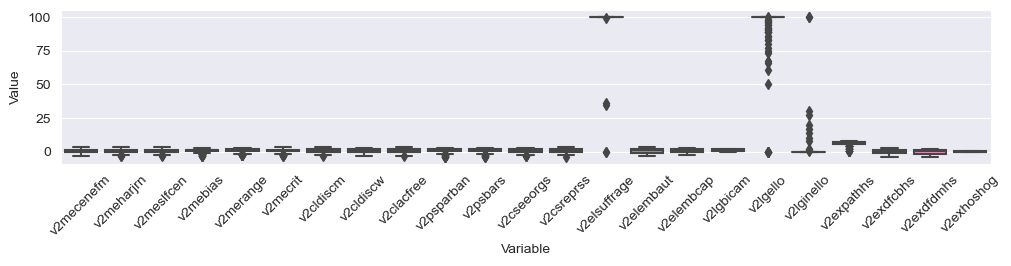

In [10]:
# plot boxes
plt.figure(figsize=[12, 2])
sns.boxplot(data=pd.DataFrame(data=X_indicators, columns=indicators), )
plt.xlabel('Variable')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
# standardize variables
X_indicators = StandardScaler().fit_transform(X_indicators)

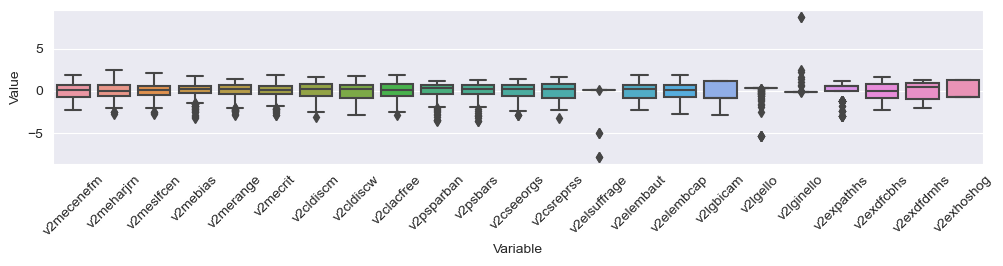

In [13]:
# plot boxes of standardized variables
plt.figure(figsize=[12, 2])
sns.boxplot(data=pd.DataFrame(data=X_indicators, columns=indicators), )
plt.xlabel('Variable')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

## Unsupervised learning
### Dimensionality reduction: Principal Component Analysis
##### Getting as many components as there are indicator variables

In [14]:
import sklearn
sklearn.__version__

'1.0.2'

In [15]:
from sklearn.decomposition import PCA

In [16]:
# create instance of class
pca = PCA(random_state=42)

In [17]:
# reduce dimensionality
X_pca = pca.fit_transform(X=X_indicators)

In [18]:
X_pca.shape

(176, 23)

In [19]:
# get components
vdem_pc = pd.DataFrame(data=X_pca, index=vdem.index)
vdem_pc.columns=[f'PC {i}' for i in vdem_pc.columns]
vdem_pc

,PC 0,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,...,PC 13,PC 14,PC 15,PC 16,PC 17,PC 18,PC 19,PC 20,PC 21,PC 22
country_name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.396224,-1.380860,0.185764,-0.344274,1.349037,-0.671946,0.097816,-0.487848,0.984287,-0.886727,...,-0.256220,0.539580,-0.390597,-0.195846,0.266302,0.446115,-0.349177,0.365556,-0.302250,-0.029108
Albania,-0.495808,0.718883,-0.739159,1.023186,0.064837,-0.321145,-0.300672,-0.621952,-1.250965,-0.535831,...,-0.116239,0.129192,0.206953,-0.378535,-0.606768,-0.014772,-0.245384,0.013478,-0.039225,0.034645
Algeria,2.606632,-0.918233,-0.446957,-0.581185,0.987331,-0.757951,-0.389843,1.582743,-0.402597,-0.629563,...,0.379954,-0.387051,-0.239084,0.283284,0.147842,-0.140953,-0.017525,0.284608,0.207248,0.138956
Angola,1.609176,-1.607969,0.266508,0.608336,-0.377813,-0.488223,0.978149,0.043918,0.615545,-0.223064,...,0.091388,0.156319,0.237581,0.560834,0.517661,0.568812,-0.316821,-0.174666,-0.370866,0.170467
Argentina,-1.943314,-2.326475,1.068213,-1.359391,-0.126721,0.463890,-0.539247,-0.381797,-0.705856,-0.000156,...,-0.385555,-0.095006,0.065730,-0.298023,0.126281,0.175535,0.222375,-0.286972,0.103930,0.109136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,5.518278,2.133639,-2.390824,0.569288,-1.404224,1.019677,-1.151302,0.080193,0.943665,-1.538304,...,0.143528,-0.002276,-0.069512,0.009392,0.055981,-0.129428,-0.061458,-0.677161,0.263022,0.068712
Yemen,4.878795,0.621895,-1.257215,-2.037000,0.154255,-1.446225,1.708707,-0.249927,-1.036053,0.681704,...,0.269237,0.441517,-0.287965,-0.201939,-0.543753,-0.309120,-0.204488,0.326631,-0.377142,0.239579
Zambia,1.197297,-2.186166,0.864055,0.914712,-0.146496,-0.796573,0.394890,0.167111,-0.297384,-1.042878,...,0.033143,-0.393912,0.148998,-0.078726,-0.040688,-0.565028,-0.061645,0.091997,-0.089104,-0.010480


##### How many components to keep?

We display a vertical orange line at five components (`x=4`) because there are five low-level indices.

In [20]:
# get explained variance ratio
pca_variance = pca.explained_variance_ratio_
pca_variance

array([0.54286483, 0.10694561, 0.08192173, 0.04702842, 0.04255354,
       0.03022521, 0.02787492, 0.02118988, 0.01852988, 0.01414133,
       0.01007002, 0.0085315 , 0.00723192, 0.00595588, 0.00584348,
       0.00512516, 0.00486499, 0.00475917, 0.00398718, 0.00380456,
       0.00303049, 0.00235166, 0.00116864])

In [21]:
import numpy as np

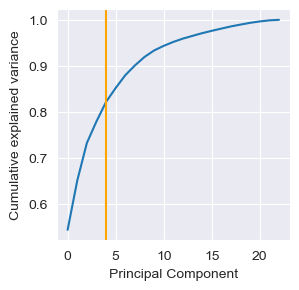

In [22]:
# plot cumulative explained variance
plt.figure(figsize=[3, 3])
plt.plot(np.cumsum(pca_variance))
plt.xlabel('Principal Component')
plt.ylabel('Cumulative explained variance')
plt.axvline(x=4, color='orange')

In [23]:
# get eigenvalues
pca_eigenvalues = pd.Series(pca.explained_variance_)
pca_eigenvalues

0     12.557239
1      2.473805
2      1.894967
3      1.087835
4      0.984324
5      0.699152
6      0.644787
7      0.490152
8      0.428623
9      0.327109
10     0.232934
11     0.197346
12     0.167285
13     0.137768
14     0.135168
15     0.118552
16     0.112534
17     0.110086
18     0.092229
19     0.088005
20     0.070100
21     0.054397
22     0.027032
dtype: float64

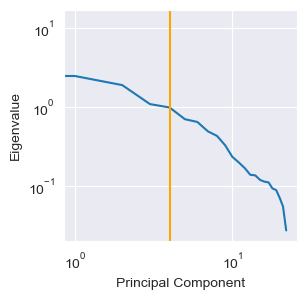

In [24]:
# plot eigenvalues
plt.figure(figsize=[3, 3])
plt.plot(pca_eigenvalues)
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.xscale('log')
plt.yscale('log')
plt.axvline(x=4, color='orange')

Decision: Keep first four components

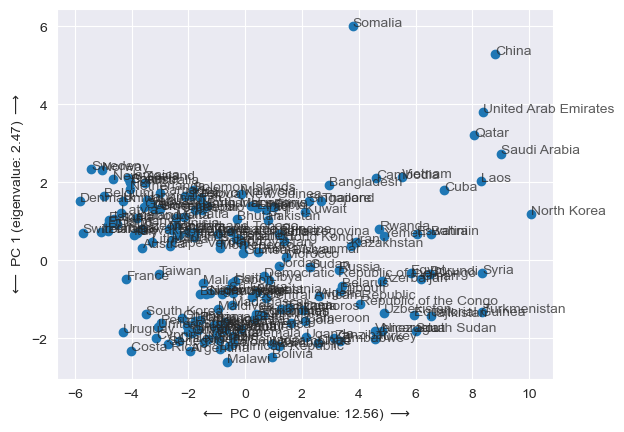

In [25]:
# plot countries
plt.scatter(x=vdem_pc['PC 0'], y=vdem_pc['PC 1'])
for i, country in enumerate(vdem_pc.index):
    plt.text(
        x = vdem_pc['PC 0'][i], 
        y = vdem_pc['PC 1'][i], 
        s = country, 
        size = 10, 
        alpha = .75
    )
plt.xlabel(f'$\longleftarrow$ PC 0 (eigenvalue: {np.round(pca_eigenvalues.loc[0], 2)}) $\longrightarrow$')
plt.ylabel(f'$\longleftarrow$ PC 1 (eigenvalue: {np.round(pca_eigenvalues.loc[1], 2)}) $\longrightarrow$')
plt.show()

### Clustering: K-Means clustering

In [26]:
from sklearn.cluster import KMeans

In [27]:
# create instance of class
kmeans = KMeans(n_clusters=4, random_state=42)

In [28]:
# cluster countries based on first five components
y_kmeans = kmeans.fit(X=X_pca[:, :4])

In [29]:
# get cluster labels
y_kmeans.labels_

array([1, 1, 2, 1, 1, 3, 3, 3, 2, 2, 2, 3, 2, 3, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 2, 2, 1, 3, 3, 1, 1, 1, 0, 1, 1, 3, 3, 2, 3, 3, 1, 3, 2, 1, 1,
       2, 1, 2, 3, 2, 1, 1, 3, 3, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 2, 1, 3, 3, 3, 1, 3, 3, 1, 2, 1, 3, 1, 1, 2, 3, 1, 3, 1,
       1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 3, 1, 1, 1, 1, 3, 3, 3, 2,
       1, 1, 2, 3, 3, 2, 1, 1, 3, 1, 3, 1, 1, 3, 0, 2, 3, 2, 2, 3, 0, 1,
       1, 1, 1, 2, 3, 3, 3, 0, 1, 1, 3, 2, 3, 1, 1, 1, 3, 3, 2, 3, 2, 1,
       2, 1, 3, 1, 3, 3, 2, 2, 1, 1, 0, 3, 3, 3, 2, 3, 2, 2, 2, 1, 2, 2])

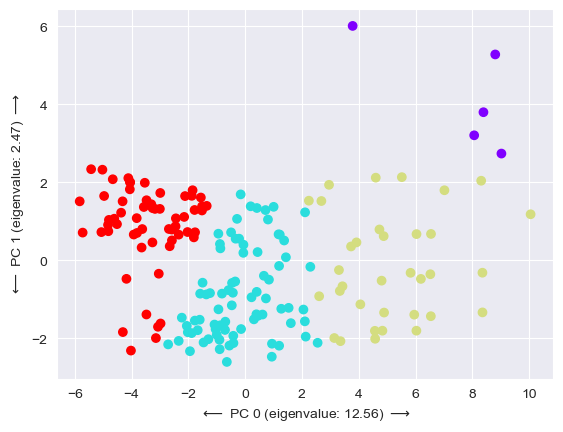

In [30]:
# plot labeled countries
plt.scatter(
    x = vdem_pc['PC 0'], 
    y = vdem_pc['PC 1'], 
    c = y_kmeans.labels_, 
    cmap = plt.cm.rainbow
)
#for i, country in enumerate(vdem_pc.index):
#    plt.text(x=vdem_pc['PC 0'][i], y=vdem_pc['PC 1'][i], s=country, size=10)
plt.xlabel(f'$\longleftarrow$ PC 0 (eigenvalue: {np.round(pca_eigenvalues.loc[0], 2)}) $\longrightarrow$')
plt.ylabel(f'$\longleftarrow$ PC 1 (eigenvalue: {np.round(pca_eigenvalues.loc[1], 2)}) $\longrightarrow$')
plt.show()

## Supervised learning
### Regression
##### Preparing the data
We will predict `total_score`, a continuous numerical measure of a nation's internet freedoms, by the five low-level indices or the 23 indicators.

In [31]:
# remove missing values
vdem_regression = vdem[~vdem['total_score'].isnull()]
vdem_regression

,total_score,v2x_regime,v2x_polyarchy,v2x_freexp_altinf,v2mecenefm,v2meharjrn,v2meslfcen,v2mebias,v2merange,v2mecrit,...,v2elembaut,v2elembcap,v2x_elecoff,v2lgbicam,v2lgello,v2lginello,v2expathhs,v2exdfcbhs,v2exdfdmhs,v2exhoshog
country_name,,,,,,,,,,,,,,,,,,,,,
Angola,64.0,1.0,0.365,0.653,1.026,0.552,0.997,0.855,-0.317,1.255,...,-0.939,-0.772,1.00,1.0,100.0,0.0,6.0,1.629,1.005,1.0
Argentina,72.0,2.0,0.771,0.843,1.274,0.948,1.320,1.419,1.525,0.646,...,1.614,1.624,1.00,2.0,100.0,0.0,7.0,2.257,1.879,1.0
Armenia,76.0,2.0,0.799,0.872,1.555,1.078,0.695,1.625,2.322,1.674,...,2.178,2.075,1.00,1.0,100.0,0.0,6.0,-2.277,-2.184,0.0
Australia,77.0,3.0,0.836,0.910,2.631,1.667,2.469,1.251,1.651,1.520,...,3.693,2.606,1.00,2.0,100.0,0.0,1.0,-1.005,-1.377,0.0
Azerbaijan,39.0,1.0,0.193,0.166,-1.769,-0.542,-0.534,-1.405,-1.711,-1.491,...,-2.283,1.563,1.00,1.0,100.0,0.0,7.0,1.813,1.434,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,26.0,1.0,0.204,0.214,-1.741,-0.913,-1.455,-1.459,-0.460,-0.773,...,-1.547,0.854,1.00,2.0,100.0,0.0,7.0,1.523,1.991,1.0
Venezuela,30.0,1.0,0.209,0.256,-2.076,-0.393,-0.477,-0.214,-0.628,-0.724,...,-1.850,0.662,1.00,1.0,100.0,0.0,7.0,1.985,2.164,1.0
Vietnam,24.0,0.0,0.149,0.137,-1.463,-1.008,-1.360,-2.123,-2.036,-1.439,...,-1.228,1.475,0.00,1.0,100.0,0.0,6.0,-0.821,-1.808,0.0


In [32]:
# choose which predictors to use
predictors = indices

In [33]:
# get array of predictor variables
X_regression = vdem_regression[predictors].to_numpy()
X_regression.shape

(63, 5)

In [34]:
# get vector of numerical response variable
y_regression = vdem_regression[['total_score']].to_numpy()

In [35]:
# standardize variables
X_regression = StandardScaler().fit_transform(X_regression)
y_regression = np.ravel(StandardScaler().fit_transform(y_regression))

##### Splitting data into sets to train and test the model

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# split data into training and test sets
X_regression_train, X_regression_test, y_regression_train, y_regression_test = train_test_split(
    X_regression, 
    y_regression, 
    test_size=.5, 
    random_state=42, 
    shuffle=True
)

#### Linear Regression
##### Fitting model on training set

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
# create instance of class and regress y on X
lr = LinearRegression(fit_intercept=False).fit(X=X_regression_train, y=y_regression_train)

In [40]:
# get coefficients
lr.coef_

array([0.17547468, 0.19658436, 0.07998768, 0.59285757, 0.03219642])

In [41]:
# prepare table to store coefficients
vdem_coef = pd.DataFrame(data= lr.coef_, index=predictors, columns=['Linear Regression'])
vdem_coef

,Linear Regression
v2x_freexp_altinf,0.175475
v2x_frassoc_thick,0.196584
v2x_suffr,0.079988
v2xel_frefair,0.592858
v2x_elecoff,0.032196


In [42]:
# get coefficient of determination (model fit)
lr.score(X=X_regression_train, y=y_regression_train)

0.8499805518424988

##### Evaluating model on test set

In [43]:
# predict response variable
y_lr_pred = lr.predict(X=X_regression_test)

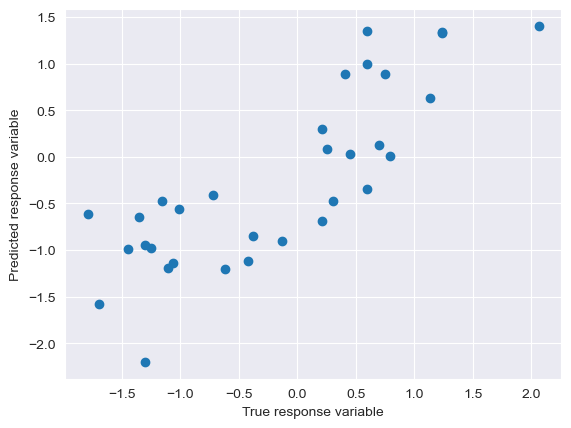

In [44]:
# plot predicted against true response variable
plt.scatter(x=y_regression_test, y=y_lr_pred)
plt.xlabel('True response variable')
plt.ylabel('Predicted response variable')
plt.show()

In [45]:
from sklearn.metrics import r2_score

In [46]:
# get coefficient of determination
r2_score(y_true=y_regression_test, y_pred=y_lr_pred)

0.6670945100733483

In [47]:
from sklearn.model_selection import cross_val_score, ShuffleSplit

In [48]:
# regress y on X five times using five folds and shuffled splits
r2_score_cv_regression = cross_val_score(
    estimator = LinearRegression(fit_intercept=False), 
    X = X_regression, 
    y = y_regression, 
    scoring = 'r2', 
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42))
r2_score_cv_regression

array([0.78368665, 0.7097422 , 0.81726061, 0.19215599, 0.67862741])

In [49]:
# get average coefficient of determination
np.mean(r2_score_cv_regression)

0.6362945709205227

#### Support Vector Regression
https://towardsdatascience.com/an-introduction-to-support-vector-regression-svr-a3ebc1672c2

In [50]:
from sklearn.svm import SVR
svr = SVR().fit(X=X_regression_train, y=y_regression_train)
y_svr_pred = svr.predict(X=X_regression_test)
np.mean(cross_val_score(estimator=SVR(), X=X_regression, y=y_regression, scoring='r2', cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)))

0.5970449533242214

#### Decision Tree Regression

In [51]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor().fit(X=X_regression_train, y=y_regression_train)
y_dtr_pred = dtr.predict(X=X_regression_test)
np.mean(cross_val_score(estimator=DecisionTreeRegressor(), X=X_regression, y=y_regression, scoring='r2', cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)))

0.18992432072040583

#### Multi-Layer Perceptron Regression (Deep Learning)

In [52]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
from sklearn.neural_network import MLPRegressor
mlpr = MLPRegressor().fit(X=X_regression_train, y=y_regression_train)
y_mlpr_pred = mlpr.predict(X=X_regression_test)
np.mean(cross_val_score(estimator=MLPRegressor(), X=X_regression, y=y_regression, scoring='r2', cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)))

0.6209102998408464

#### Model selection

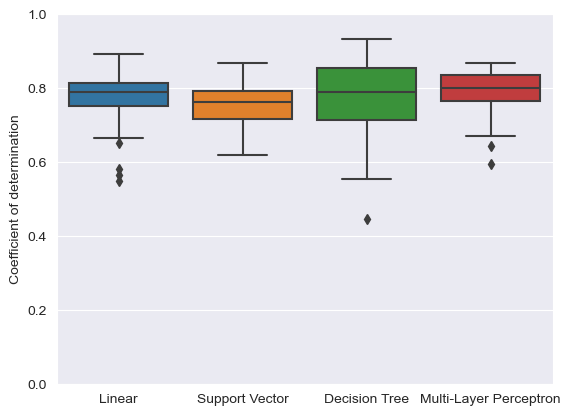

In [54]:
# run 100 regressions for 4 regressors each and shuffled splits but without a defined random state
regressors = [LinearRegression(fit_intercept=False), SVR(), DecisionTreeRegressor(), MLPRegressor()]
r2_scores = []
for i in range(100):
    r2_scores_regressor = []
    for j in range(len(regressors)):
        regressor = regressors[j].fit(X=X_regression_train, y=y_regression_train)
        X_regression_train, X_regression_test, y_regression_train, y_regression_test = train_test_split(X_regression, y_regression, test_size=.5, shuffle=True)
        y_regressor_pred = regressor.predict(X=X_regression_test)
        r2_scores_regressor.append(r2_score(y_true=y_regression_test, y_pred=y_regressor_pred))
    r2_scores.append(r2_scores_regressor)

# store coefficients of determination in dataframe
r2_scores = pd.DataFrame(data=r2_scores, columns=['Linear', 'Support Vector', 'Decision Tree', 'Multi-Layer Perceptron'])

# plot coefficients of determination
sns.boxplot(data=r2_scores)
plt.ylabel('Coefficient of determination')
plt.ylim([0, 1])
plt.show()

### Classification
##### Preparing the data
We will predict `v2x_regime`, a four-part regime classification (0 = closed autocracy, 3 = liberal democracy), by the five low-level indices or the 23 indicators.

In [55]:
# choose which predictors to use
predictors = indices

In [56]:
# get array of predictor variables
X_classification = vdem[predictors].to_numpy()
X_classification.shape

(176, 5)

In [57]:
# get vector of categorical response variable
y_classification = np.ravel(vdem[['v2x_regime']].astype(int).to_numpy())

In [58]:
# standardize variables
X_classification = StandardScaler().fit_transform(X_classification)

##### Splitting data into sets to train and test the model

In [59]:
# split data into training and test sets
X_classification_train, X_classification_test, y_classification_train, y_classification_test = train_test_split(
    X_classification, 
    y_classification, 
    test_size=.5, 
    random_state=42, 
    shuffle=True
)

#### Support Vector Classification
##### Fitting model on training set

In [60]:
from sklearn.svm import SVC

In [61]:
# create instance of class and regress y on X
svc = SVC().fit(X=X_classification_train, y=y_classification_train)

In [62]:
# get accuracy (model fit)
svc.score(X=X_classification_train, y=y_classification_train)

0.9204545454545454

##### Evaluating model on test set

In [63]:
# predict response variable
y_svc_pred = svc.predict(X=X_classification_test)

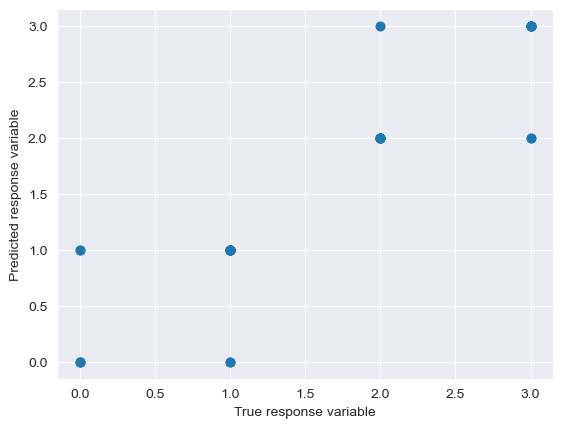

In [64]:
# plot predicted against true response variable
plt.scatter(x=y_classification_test, y=y_svc_pred)
plt.xlabel('True response variable')
plt.ylabel('Predicted response variable')
plt.show()

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
# get accuracy
accuracy_score(y_true=y_classification_test, y_pred=y_svc_pred)

0.875

In [67]:
# regress y on X five times using five folds and shuffled splits
r2_score_cv_classification = cross_val_score(
    estimator = SVC(), 
    X = X_classification, 
    y = y_classification, 
    scoring = 'accuracy', 
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42))
r2_score_cv_classification

array([0.88888889, 0.86111111, 0.91666667, 0.80555556, 0.80555556])

In [68]:
# get average accuracy
np.mean(r2_score_cv_classification)

0.8555555555555555